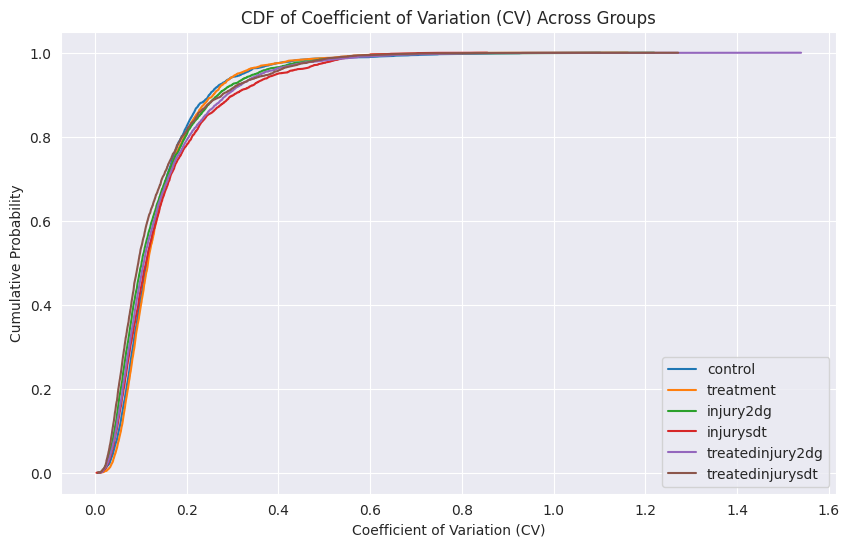

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = '/media/melissa/EXTERNAL_USB/KusterLab_Melissa_Vorster/DatabaseSearchResults/FP_WWA_Koina_SixGroups/InputFiltered.xlsx' 

df = pd.read_excel(file_path, sheet_name='Sheet1')
df
# Step 1: Filter out contaminants (contaminants have 'contam_' in their 'Protein' name)
#df = df[~df['Protein '].str.contains('contam_')].copy()

# Define your groups
groups = {
    'control': ['Control_A1', 'Control_A2', 'Control_A3', 'Control_A4', 'Control_A5'],
    'treatment': ['Treatment_B1', 'Treatment_B2', 'Treatment_B3', 'Treatment_B4', 'Treatment_B5'],
    'injury2dg': ['Injury2DG_C1', 'Injury2DG_C2', 'Injury2DG_C3', 'Injury2DG_C4', 'Injury2DG_C5'],
    'injurysdt': ['InjurySDT_E1', 'InjurySDT_E2', 'InjurySDT_E3', 'InjurySDT_E4', 'InjurySDT_E5'],
    'treatedinjury2dg': ['TreatedInjury2DG_D1', 'TreatedInjury2DG_D2', 'TreatedInjury2DG_D3', 'TreatedInjury2DG_D4', 'TreatedInjury2DG_D5'],
    'treatedinjurysdt': ['TreatedInjurySDT_F1', 'TreatedInjurySDT_F2', 'TreatedInjurySDT_F3', 'TreatedInjurySDT_F4', 'TreatedInjurySDT_F5']
}

# Function to calculate CV
def calculate_cv(data):
    return data.std(axis=1) / data.mean(axis=1)

# Create a dictionary to store CV for each group
cv_dict = {}

# Calculate CV for each group and store in cv_dict
for group_name, columns in groups.items():
    cv_values = calculate_cv(df[columns])
    cv_dict[group_name] = cv_values

# Plotting the CDF for each group
plt.figure(figsize=(10, 6))

for group_name, cv_values in cv_dict.items():
    # Sort CV values for CDF
    sorted_cv = np.sort(cv_values)
    # Calculate CDF
    cdf = np.arange(1, len(sorted_cv) + 1) / len(sorted_cv)
    plt.plot(sorted_cv, cdf, label=group_name)

# Add labels and title
plt.title('CDF of Coefficient of Variation (CV) Across Groups')
plt.xlabel('Coefficient of Variation (CV)')
plt.ylabel('Cumulative Probability')
plt.legend()

# Save the plot as an SVG file
plt.savefig('/media/melissa/EXTERNAL_USB/KusterLab_Melissa_Vorster/DatabaseSearchResults/FP_WWA_Koina_SixGroups/cdf_coefficient_of_variation.svg', format='svg')

# Show the plot
plt.show()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = '/media/melissa/EXTERNAL_USB/KusterLab_Melissa_Vorster/DatabaseSearchResults/FP_WWA_Koina_SixGroups/df_FilteredAndLoggedAndLong_FormattedGeneToo.csv' 
df = pd.read_csv(file_path)

# Step 1: Filter out contaminants (contaminants have 'contam_' in their 'Protein' name)
df = df[~df['Protein'].str.contains('contam_')].copy()

# Ensure the DataFrame is in the expected long format
# Required columns: Protein ID, Group, Intensity
# Example columns: ['Protein ID', 'Sample', 'Group', 'Intensity']

# Define your groups
groups = {
    'control': ['Control_A1', 'Control_A2', 'Control_A3', 'Control_A4', 'Control_A5'],
    'treatment': ['Treatment_B1', 'Treatment_B2', 'Treatment_B3', 'Treatment_B4', 'Treatment_B5'],
    'injury2dg': ['Injury2DG_C1', 'Injury2DG_C2', 'Injury2DG_C3', 'Injury2DG_C4', 'Injury2DG_C5'],
    'injurysdt': ['InjurySDT_E1', 'InjurySDT_E2', 'InjurySDT_E3', 'InjurySDT_E4', 'InjurySDT_E5'],
    'treatedinjury2dg': ['TreatedInjury2DG_D1', 'TreatedInjury2DG_D2', 'TreatedInjury2DG_D3', 'TreatedInjury2DG_D4', 'TreatedInjury2DG_D5'],
    'treatedinjurysdt': ['TreatedInjurySDT_F1', 'TreatedInjurySDT_F2', 'TreatedInjurySDT_F3', 'TreatedInjurySDT_F4', 'TreatedInjurySDT_F5']
}

# Function to calculate CV
def calculate_cv(group):
    return group['Intensity'].std() / group['Intensity'].mean()

# Calculate CV for each protein within each group
cv_df = df.groupby(['Group', 'Protein ID']).apply(calculate_cv).reset_index(name='CV')

# Plotting the CDF for each group
plt.figure(figsize=(10, 6))

# Iterate over each group to plot its CDF
for group_name, group_data in cv_df.groupby('Group'):
    # Sort CV values for CDF
    sorted_cv = np.sort(group_data['CV'].dropna())
    # Calculate CDF
    cdf = np.arange(1, len(sorted_cv) + 1) / len(sorted_cv)
    plt.plot(sorted_cv, cdf, label=group_name)

# Add labels and title
plt.title('CDF of Coefficient of Variation (CV) Across Groups')
plt.xlabel('Coefficient of Variation (CV)')
plt.ylabel('Cumulative Probability')
plt.legend()

# Show the plot
plt.show()


KeyError: 'Group'

---------------------------------------------------------------

In [6]:
'''Load data, filter contam'''
# Load the data
file_path = '/media/melissa/EXTERNAL_USB/KusterLab_Melissa_Vorster/DatabaseSearchResults/FP_WWA_Koina_SixGroups/Input_ProteinGeneIntensity.xlsx'
df = pd.read_excel(file_path)

# Step 1: Filter out contaminants (contaminants have 'contam_' in their 'Protein' name)
df_contam_filtered = df[~df['Protein'].str.contains('contam_')]

df_contam_filtered = df_contam_filtered.drop(columns = 'Protein')
df_contam_filtered = df_contam_filtered.drop(columns = 'Description')
df_contam_filtered

,Gene,Protein ID,Control_A1,Control_A2,Control_A3,Control_A4,Control_A5,Treatment_B1,Treatment_B2,Treatment_B3,...,InjurySDT_E1,InjurySDT_E2,InjurySDT_E3,InjurySDT_E4,InjurySDT_E5,TreatedInjurySDT_F1,TreatedInjurySDT_F2,TreatedInjurySDT_F3,TreatedInjurySDT_F4,TreatedInjurySDT_F5
23,Nova2,A0A1W2P872-2,7.845835e+06,9.480695e+06,7.147872e+06,6.309984e+06,7547918.0,5259320.5,1.025222e+07,9.076910e+06,...,7.223971e+06,6.410172e+06,7.707390e+06,6.760366e+06,8.352260e+06,4.618446e+06,8.321470e+06,6.703711e+06,6.741556e+06,6.318450e+06
24,Qser1,A0A338P6K9,2.040239e+07,1.493412e+07,1.634020e+07,1.802194e+07,0.0,15638146.0,1.597544e+07,1.979982e+07,...,0.000000e+00,1.140679e+07,0.000000e+00,6.905398e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.270144e+06,6.551130e+06
25,Spata5l1,A0A7N9VSG0,0.000000e+00,0.000000e+00,2.783782e+06,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.578568e+06,0.000000e+00,5.764367e+06,0.000000e+00,6.661485e+06,6.425998e+06
26,Tbc1d25,A1A5B6,8.743677e+06,8.804247e+06,8.285544e+06,6.104560e+06,11731712.0,6664389.5,6.788116e+06,1.100277e+07,...,8.689169e+06,9.868324e+06,8.087341e+06,6.626632e+06,1.010310e+07,0.000000e+00,0.000000e+00,1.057316e+07,8.407773e+06,1.001314e+07
27,Cul4b,A2A432-2,2.331234e+07,2.243326e+07,1.949912e+07,2.384441e+07,22384452.0,22500442.0,2.074310e+07,1.803306e+07,...,2.465441e+07,2.082806e+07,3.369168e+07,1.999415e+07,2.898239e+07,2.432726e+07,2.429113e+07,3.110142e+07,2.546463e+07,2.723250e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5974,Prss1,Q9Z1R9,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5975,Ank3,S4R2K9,5.909923e+07,4.349395e+07,1.091433e+08,9.566398e+07,56268744.0,19960136.0,4.116964e+07,4.674296e+07,...,6.769628e+07,5.194904e+07,8.157616e+07,6.164318e+07,7.109452e+07,6.668236e+07,6.335508e+07,7.841789e+07,5.004860e+07,7.423762e+07
5976,Rsrc2,S4R2L4,5.149879e+07,4.237742e+07,4.329360e+07,3.961724e+07,29545052.0,33003026.0,3.094767e+07,3.016581e+07,...,3.757876e+07,3.708876e+07,4.694361e+07,2.995615e+07,4.157688e+07,4.011335e+07,3.763690e+07,4.065450e+07,3.537831e+07,4.088182e+07
5977,Mroh6,V9GX81,4.731972e+09,3.033001e+09,4.334569e+09,2.924288e+09,0.0,0.0,3.553294e+09,5.477647e+09,...,9.629823e+09,3.962589e+09,1.437978e+10,7.706102e+09,1.283915e+10,9.310132e+09,6.884785e+09,1.286979e+10,7.508391e+09,1.656132e+10


In [8]:
'''Filter: completeness'''
# First filter: proteins with non-zero intensity values across all samples and groups
df_ContamAndComplete_filtered = df_contam_filtered[
    (df_contam_filtered != 0).all(axis=1) &
    (df_contam_filtered.notnull().all(axis=1))
]

# Displaying the filtered results
print("Filtered for Completeness (No Missing Values and No Zeros):")
output_file_path= '/media/melissa/EXTERNAL_USB/KusterLab_Melissa_Vorster/DatabaseSearchResults/FP_WWA_Koina_SixGroups/InputFiltered.xlsx'
df_ContamAndComplete_filtered.to_excel(output_file_path, index=False, sheet_name='Sheet1')



Filtered for Completeness (No Missing Values and No Zeros):
